# Exploratory Analysis and Hypothesis Testing Homework

## Section 1: Heart Attack Correlation Analysis

### Question 1: What is the goal of Correlation Analysis?

##### The goal of correlation analysis in data analytics is to try to explore and find relationships between two different variables, and if a strong relationship exists, explore those relationships further. 

### Question 2: What Types of Data Transformations did you do to perform correlation analysis?

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from pandas.tools import plotting
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('data/Chapter09DataSet_Training.csv')
df.head(2)

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,2nd_Heart_Attack
0,60,2,0,1,150,1,50,Yes
1,69,2,1,1,170,0,60,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 8 columns):
Age                  138 non-null int64
Marital_Status       138 non-null int64
Gender               138 non-null int64
Weight_Category      138 non-null int64
Cholesterol          138 non-null int64
Stress_Management    138 non-null int64
Trait_Anxiety        138 non-null int64
2nd_Heart_Attack     138 non-null object
dtypes: int64(7), object(1)
memory usage: 8.7+ KB


In [7]:
df.describe()

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,62.978261,1.695652,0.623188,0.920290,177.391304,0.442029,55.434783
std,7.853092,0.824875,0.486352,0.764749,32.262707,0.498437,12.373126
min,42.000000,0.000000,0.000000,0.000000,122.000000,0.000000,35.000000
25%,58.000000,1.000000,0.000000,0.000000,161.000000,0.000000,45.000000
50%,63.000000,2.000000,1.000000,1.000000,172.000000,0.000000,55.000000
75%,69.000000,2.000000,1.000000,1.750000,188.750000,1.000000,60.000000
max,81.000000,3.000000,1.000000,2.000000,239.000000,1.000000,80.000000


In [8]:
df.isnull().sum()

Age                  0
Marital_Status       0
Gender               0
Weight_Category      0
Cholesterol          0
Stress_Management    0
Trait_Anxiety        0
2nd_Heart_Attack     0
dtype: int64

In [9]:
df = df.replace({'2nd_Heart_Attack': 'Yes'}, {'2nd_Heart_Attack': 1})
df = df.replace({'2nd_Heart_Attack': 'No'}, {'2nd_Heart_Attack': 0})

In [10]:
df.head(5)

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,2nd_Heart_Attack
0,60,2,0,1,150,1,50,1
1,69,2,1,1,170,0,60,1
2,52,1,0,0,174,1,35,0
3,66,2,1,1,169,0,60,1
4,70,3,0,1,237,0,65,1


In [11]:
df.corr()

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,2nd_Heart_Attack
Age,1.000000,0.427159,0.076195,0.402007,0.395331,-0.359295,0.667169,0.499182
Marital_Status,0.427159,1.000000,-0.033225,0.065402,0.273574,-0.291773,0.238340,0.364978
Gender,0.076195,-0.033225,1.000000,0.448531,0.191354,-0.241320,0.082007,0.317746
Weight_Category,0.402007,0.065402,0.448531,1.000000,0.397702,-0.347322,0.501244,0.730832
Cholesterol,0.395331,0.273574,0.191354,0.397702,1.000000,-0.405735,0.579485,0.506531
Stress_Management,-0.359295,-0.291773,-0.241320,-0.347322,-0.405735,1.000000,-0.321362,-0.439473
Trait_Anxiety,0.667169,0.238340,0.082007,0.501244,0.579485,-0.321362,1.000000,0.482548
2nd_Heart_Attack,0.499182,0.364978,0.317746,0.730832,0.506531,-0.439473,0.482548,1.000000


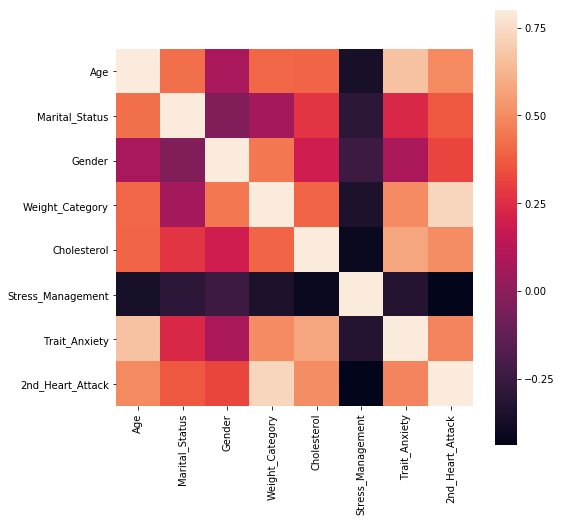

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),vmax=.8, square=True)

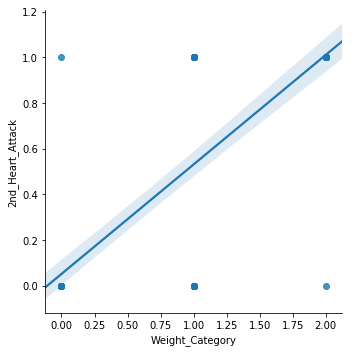

In [13]:
sns.lmplot('Weight_Category', '2nd_Heart_Attack', df)

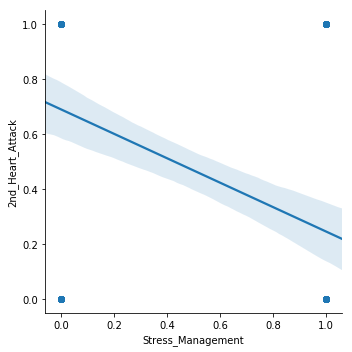

In [14]:
sns.lmplot('Stress_Management', '2nd_Heart_Attack', df)

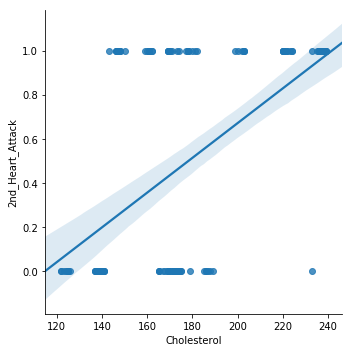

In [15]:
sns.lmplot('Cholesterol', '2nd_Heart_Attack', df)

## Question 3/4: Results of Correlation Analysis/Describe People who are more likely to have a second heart attack.

#### The three factors that are most highly correlated with having a second heart attack are

        1: Weight Category
        2: Stress Management
        3: Cholesterol

## Question 5: Recomendation to Healthcare provider.

#### My recomendation to a healthcare provider would be to advise patients to lose weight, manage their stress, and keep their good cholesterol high and their bad cholesterol low to minimize their chance of having a second heart attack.

# Section 2:

## Question 1: How many people did/did not have affairs?

In [16]:
df1 = pd.read_excel('data/affairs.xlsx')

In [17]:
df1.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affairs_yes_no
0,3,32.0,9.0,3.0,3,17,2,5,0.111111,1
1,3,27.0,13.0,3.0,1,14,3,4,3.230769,1
2,4,22.0,2.5,0.0,1,16,3,5,1.400000,1
3,4,37.0,16.5,4.0,3,16,5,5,0.727273,1
4,5,27.0,9.0,1.0,1,14,3,4,4.666666,1


In [18]:
df1.groupby('affairs_yes_no').size()

affairs_yes_no
0    4313
1    2053
dtype: int64

##### 4313 people did not have an affair, while 2053 people did have an affair.

## Question 2: Groupbys

rate_marriage
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
3    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
4    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
5    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

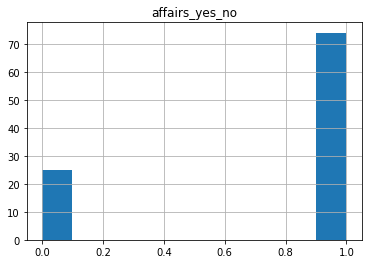

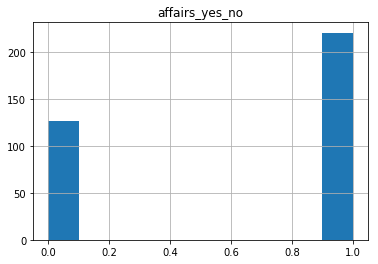

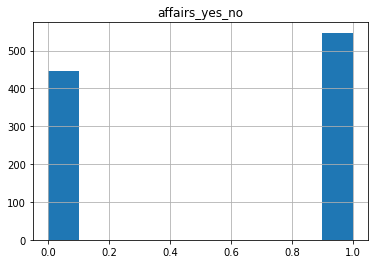

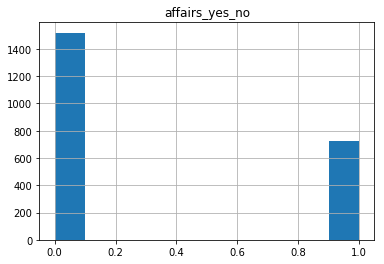

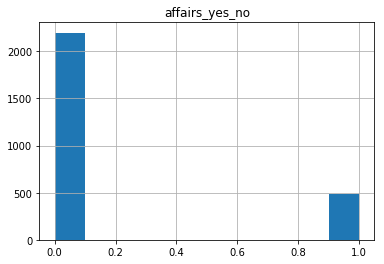

In [19]:
df1.groupby('rate_marriage').hist('affairs_yes_no')

age
17.5    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
22.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
27.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
32.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
37.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
42.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

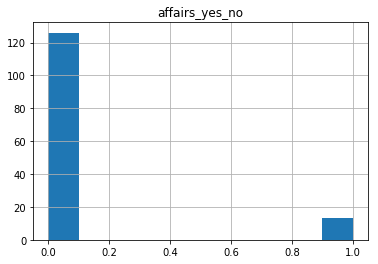

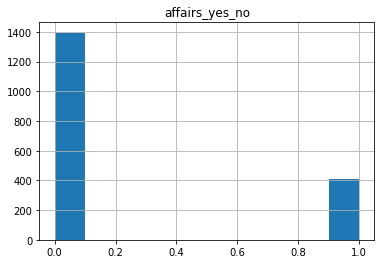

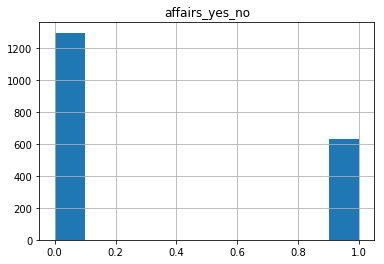

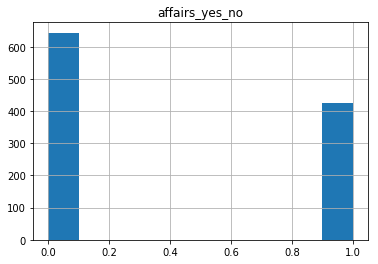

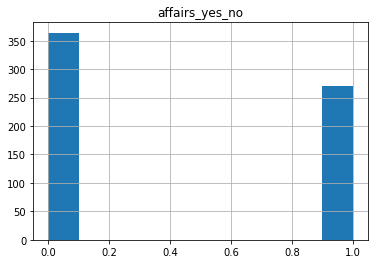

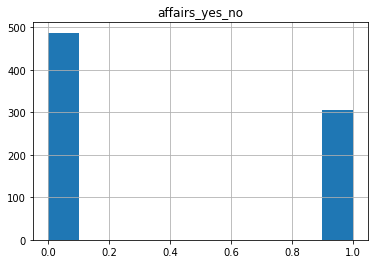

In [20]:
df1.groupby('age').hist('affairs_yes_no')

yrs_married
0.5     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2.5     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
6.0     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
9.0     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
13.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
16.5    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
23.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

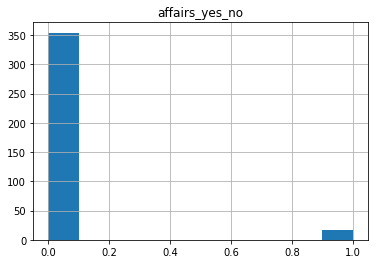

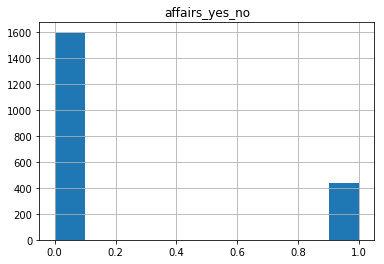

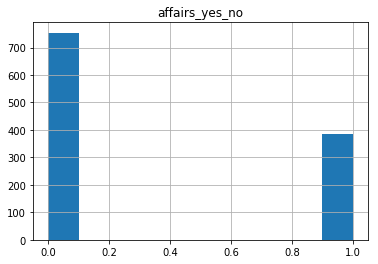

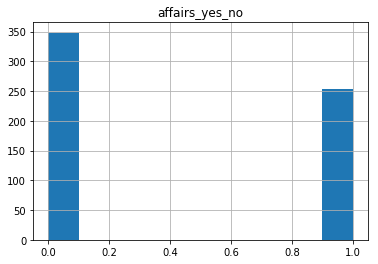

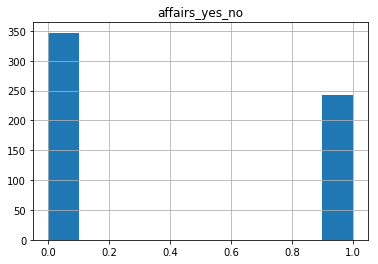

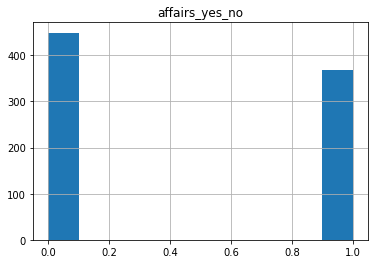

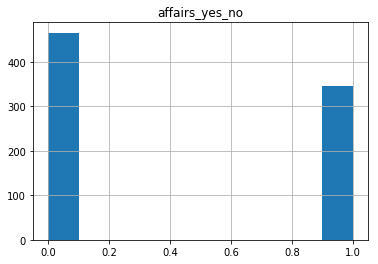

In [21]:
df1.groupby('yrs_married').hist('affairs_yes_no')

religious
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
3    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
4    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

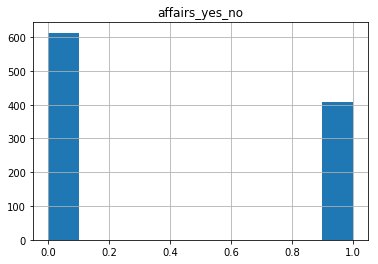

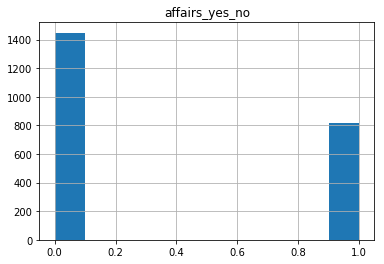

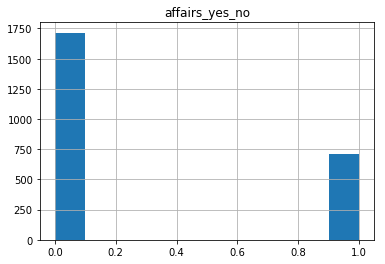

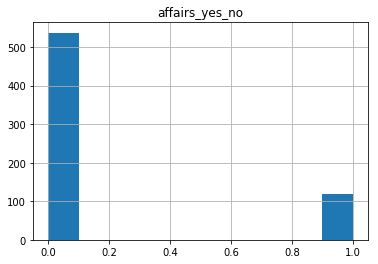

In [22]:
df1.groupby('religious').hist('affairs_yes_no')

educ
9     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
12    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
14    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
16    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
17    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
20    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

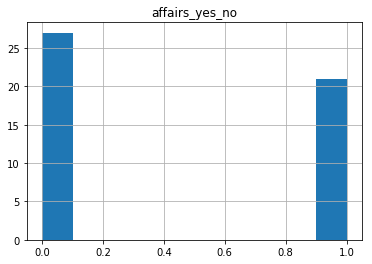

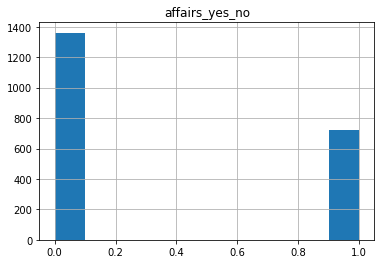

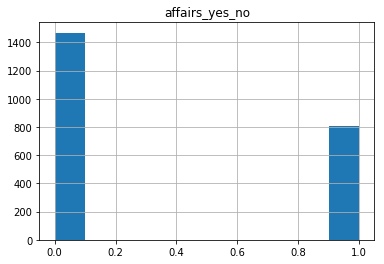

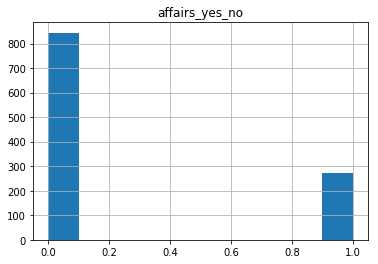

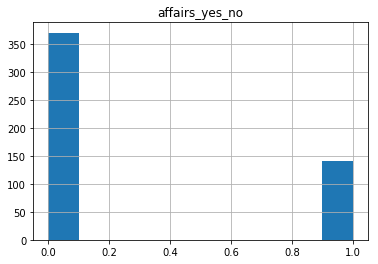

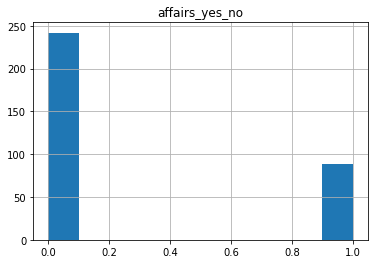

In [23]:
df1.groupby('educ').hist('affairs_yes_no')

#### It appears from preliminary groupby analysis that the characteristics of people who have had affairs are as follows:

        1: Poor marriage
        2: Generally Less Educated
        3: Generally Less Religious
        4: Generally Older People
        5: Generally People who have been married for longer

## Question 3: Pairwise comparisons for Religious People

In [24]:
df1.head(1)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affairs_yes_no
0,3,32.0,9.0,3.0,3,17,2,5,0.111111,1


In [25]:
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

NotRel = df1[df1['religious'] == 1]['affairs_yes_no']
MildRel = df1[df1['religious'] == 2]['affairs_yes_no']
FairlyRel = df1[df1['religious'] == 3]['affairs_yes_no']
StrongRel = df1[df1['religious'] == 4]['affairs_yes_no']

In [26]:
print pairwise_tukeyhsd(df1['affairs_yes_no'], df1['religious'])

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  1      2    -0.0383  -0.0832  0.0065 False 
  1      3    -0.1077  -0.1521 -0.0633  True 
  1      4    -0.2182  -0.2778 -0.1586  True 
  2      3    -0.0694  -0.1042 -0.0346  True 
  2      4    -0.1799  -0.2327 -0.1271  True 
  3      4    -0.1105  -0.1629 -0.0581  True 
---------------------------------------------


#### There are significant differences in the rate of people having affairs between all groups except non-religious and slightly-religious people

## Question 4: Pairwise Comparison of rate_marriage

In [27]:
vpoor = df1[df1['rate_marriage'] == 1]['affairs_yes_no']
poor = df1[df1['rate_marriage'] == 2]['affairs_yes_no']
ok = df1[df1['rate_marriage'] == 3]['affairs_yes_no']
good = df1[df1['rate_marriage'] == 4]['affairs_yes_no']
vgood = df1[df1['rate_marriage'] == 4]['affairs_yes_no']

In [28]:
print pairwise_tukeyhsd(df1['affairs_yes_no'], df1['rate_marriage'])

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  1      2    -0.1124  -0.2493  0.0245 False 
  1      3    -0.1966  -0.3233  -0.07   True 
  1      4    -0.4245   -0.548 -0.3011  True 
  1      5     -0.566   -0.689  -0.443  True 
  2      3    -0.0842  -0.1591 -0.0093  True 
  2      4    -0.3121  -0.3814 -0.2429  True 
  2      5    -0.4536  -0.5221 -0.3851  True 
  3      4    -0.2279  -0.2737 -0.1821  True 
  3      5    -0.3694   -0.414 -0.3248  True 
  4      5    -0.1415  -0.1759 -0.1071  True 
---------------------------------------------


#### There are significant differences in the rate of people having affairs between all groups except people who rate their marriages as very poor and poor.

## Question 5: Pairwise Comparisons of Age

In [29]:
print pairwise_tukeyhsd(df1['affairs_yes_no'], df1['age'])

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 17.5   22.0   0.132    0.0164 0.2477  True 
 17.5   27.0   0.2343   0.1189 0.3496  True 
 17.5   32.0   0.304    0.1856 0.4225  True 
 17.5   37.0   0.3323   0.2093 0.4554  True 
 17.5   42.0   0.2924   0.1716 0.4131  True 
 22.0   27.0   0.1023   0.0592 0.1453  True 
 22.0   32.0   0.172    0.1213 0.2227  True 
 22.0   37.0   0.2003   0.1396 0.261   True 
 22.0   42.0   0.1603   0.1043 0.2163  True 
 27.0   32.0   0.0698   0.0197 0.1198  True 
 27.0   37.0   0.0981   0.0379 0.1582  True 
 27.0   42.0   0.0581   0.0027 0.1135  True 
 32.0   37.0   0.0283  -0.0375 0.0941 False 
 32.0   42.0  -0.0117  -0.0733 0.0499 False 
 37.0   42.0   -0.04    -0.11   0.03  False 
--------------------------------------------


#### There is a significant difference between every age bin except 32-37, 32-42, and 37-42.

## Question 6: How do you use P-value in a t-test.

The p-value is equal to one minus the cummulative area under the curve of a probabilty density function at a certain value of a random variable X. Alpha is a cutoff value that we select to determine what p-values we will need to reject our null hypothesis. p-values that are smaller than our Alpha value mean that we need to reject our null hypothesis, and p-values greater than Alpha mean that we fail to reject our null hypothesis. p-values indicate the probability that a random observation takes on a certain value. We generally use an Alpha of 0.05 as our cutoff value for our rejection region on our probability density function. Anything that falls to the right of our specified Alpha value means that we reject our null hypothesis. Anything to the left means we fail to reject.

## Question 7: Your own question

    Is cheating dependent upon a person's occupation?

In [30]:
student = df1[df1['occupation'] == 1]['affairs_yes_no']
semi_skilled = df1[df1['occupation'] == 2]['affairs_yes_no']
white_collar = df1[df1['occupation'] == 3]['affairs_yes_no']
teacher = df1[df1['occupation'] == 4]['affairs_yes_no']
manager = df1[df1['occupation'] == 5]['affairs_yes_no']
adv_degree = df1[df1['occupation'] == 6]['affairs_yes_no']

In [31]:
print pairwise_tukeyhsd(df1['affairs_yes_no'], df1['occupation'])

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  1      2     0.1226  -0.0892  0.3344 False 
  1      3     0.176   -0.0324  0.3844 False 
  1      4     0.091   -0.1182  0.3002 False 
  1      5     0.2468   0.0343  0.4594  True 
  1      6     0.1962  -0.0465  0.439  False 
  2      3     0.0534   0.0017  0.1051  True 
  2      4    -0.0316  -0.0864  0.0231 False 
  2      5     0.1242   0.0578  0.1907  True 
  2      6     0.0736  -0.0611  0.2083 False 
  3      4     -0.085  -0.1249 -0.0452  True 
  3      5     0.0708   0.016   0.1256  True 
  3      6     0.0202  -0.1091  0.1496 False 
  4      5     0.1558   0.0981  0.2135  True 
  4      6     0.1052  -0.0254  0.2359 False 
  5      6    -0.0506  -0.1865  0.0853 False 
---------------------------------------------


##### "On my honor as a student, I have neither given nor recieved any unauthorized aid on this academic work."

Eric VanMeerhaeghe